In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

### Data import

In [3]:
df = pd.read_csv('/Users/supratim/Desktop/PregOA_additionals/confounder2021.csv').drop(columns=['Unnamed: 0'])
print(df.shape)
df

(5319, 9)


,ID,age,sex,OA,bmi,level_education,N_kids,has_kid,N_disease
0,1000007,71,1,0,16.852522,3,0,0,1
1,1000018,83,0,0,25.249337,2,1,1,1
2,1000020,72,1,0,30.119376,1,2,1,3
3,1000024,80,1,0,37.109375,1,3,1,4
4,1000319,98,1,0,22.959088,1,0,0,2
...,...,...,...,...,...,...,...,...,...
5314,4005996,47,0,0,25.507493,1,2,1,1
5315,4005997,76,1,1,25.402816,0,2,1,3
5316,4005998,71,0,1,17.592593,3,2,1,3
5317,4005999,78,0,1,26.827421,3,4,1,3


In [4]:
# unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n" + "-"*40 + "\n") 

Unique values in column 'ID':
[1000007 1000018 1000020 ... 4005998 4005999 4006002]

----------------------------------------

Unique values in column 'age':
[71 83 72 80 98 95 79 87 82 91 93 78 76 86 85 94 84 81 90 77 74 70 89 67
 68 75 73 69 66 64 65 58 59 60 62 63 61 92 88 56 53 55 54 57 52 49 51 50
 47 48 46]

----------------------------------------

Unique values in column 'sex':
[1 0]

----------------------------------------

Unique values in column 'OA':
[0 1]

----------------------------------------

Unique values in column 'bmi':
[16.8525225  25.2493372  30.11937557 ... 30.02659498 20.37037037
 17.59259259]

----------------------------------------

Unique values in column 'level_education':
[3 2 1 0]

----------------------------------------

Unique values in column 'N_kids':
[0 1 2 3 4]

----------------------------------------

Unique values in column 'has_kid':
[0 1]

----------------------------------------

Unique values in column 'N_disease':
[ 1  3  4  2  8  0  6  5

In [5]:
df

,ID,age,sex,OA,bmi,level_education,N_kids,has_kid,N_disease
0,1000007,71,1,0,16.852522,3,0,0,1
1,1000018,83,0,0,25.249337,2,1,1,1
2,1000020,72,1,0,30.119376,1,2,1,3
3,1000024,80,1,0,37.109375,1,3,1,4
4,1000319,98,1,0,22.959088,1,0,0,2
...,...,...,...,...,...,...,...,...,...
5314,4005996,47,0,0,25.507493,1,2,1,1
5315,4005997,76,1,1,25.402816,0,2,1,3
5316,4005998,71,0,1,17.592593,3,2,1,3
5317,4005999,78,0,1,26.827421,3,4,1,3


In [6]:
def summarize_dataframe(df):
    """
    Summarize a DataFrame by calculating:
    - Mean and SD for continuous variables
    - Counts and percentages for categorical variables
    """
    summary = {}
    
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            unique_values = df[column].nunique()
            if unique_values > 10:  
                mean = df[column].mean()
                std = df[column].std()
                summary[column] = {
                    'Mean': round(mean, 2),
                    'SD': round(std, 2)
                }
            else: 
                counts = df[column].value_counts()
                percentages = (counts / len(df) * 100).round(2)
                summary[column] = {
                    'Counts': counts.to_dict(),
                    'Percentages': percentages.to_dict()
                }
        else:
            counts = df[column].value_counts()
            percentages = (counts / len(df) * 100).round(2)
            summary[column] = {
                'Counts': counts.to_dict(),
                'Percentages': percentages.to_dict()
            }
    
    return pd.DataFrame(summary).transpose()

summary_df = summarize_dataframe(df)


In [7]:
def create_summary_table(df):
    groups = df.groupby(['sex', 'has_kid'])
    table_data = {
        "Characteristic": [
            "Number of Participants (n)", 
            "Age (mean ± SD)", 
            "Education (Counts, %)", 
            "Number of Diseases (mean ± SD)"
        ]
    }
    
    group_labels = ["Men without Kids", "Women without Kids", "Women with Kids", "Men with Kids"]
    
    for label, (sex, has_kid) in zip(group_labels, [(1, 0), (0, 0), (0, 1), (1, 1)]):
        group = groups.get_group((sex, has_kid))
        
        # Number of participants
        n_participants = len(group)
        
        # Age
        age_mean = group['age'].mean()
        age_sd = group['age'].std()
        age_summary = f"{age_mean:.2f} ± {age_sd:.2f}"
        
        # Education
        education_counts = group['level_education'].value_counts()
        education_percentages = (education_counts / n_participants * 100).round(2)
        education_summary = "; ".join([f"{level}: {count} ({percent}%)" 
                                       for level, count, percent in zip(
                                           education_counts.index, 
                                           education_counts.values, 
                                           education_percentages.values)])
        
        # Number of Diseases
        disease_mean = group['N_disease'].mean()
        disease_sd = group['N_disease'].std()
        disease_summary = f"{disease_mean:.2f} ± {disease_sd:.2f}"
        
  
        table_data[label] = [
            n_participants, 
            age_summary, 
            education_summary, 
            disease_summary
        ]

    table_df = pd.DataFrame(table_data)
    
    return table_df

summary_table = create_summary_table(df)
summary_table

,Characteristic,Men without Kids,Women without Kids,Women with Kids,Men with Kids
0,Number of Participants (n),319,313,2328,2359
1,Age (mean ± SD),65.67 ± 10.27,66.52 ± 9.87,69.65 ± 10.52,68.25 ± 10.25
2,"Education (Counts, %)",1: 150 (47.02%); 3: 109 (34.17%); 2: 46 (14.42...,1: 142 (45.37%); 3: 118 (37.7%); 2: 49 (15.65%...,3: 978 (42.01%); 1: 949 (40.76%); 2: 366 (15.7...,1: 1262 (53.5%); 3: 597 (25.31%); 2: 326 (13.8...
3,Number of Diseases (mean ± SD),2.22 ± 1.52,2.23 ± 1.57,2.30 ± 1.65,2.24 ± 1.71


### Analysis

#### 1. Risk of OA in Men without kid vs. Women without kid

In [8]:
# 1. Men without kid vs. Women without kid
men_without_kid = df[(df['sex'] == 0) & (df['has_kid'] == 0)]
women_without_kid = df[(df['sex'] == 1) & (df['has_kid'] == 0)]

print(f"Number of men without kids: {len(men_without_kid)}")
print(f"Number of women without kids: {len(women_without_kid)}")

men_without_kid_with_oa = men_without_kid[men_without_kid['OA'] == 1]
print(f"Number of men without kids who have OA: {len(men_without_kid_with_oa)}")

women_without_kid_with_oa = women_without_kid[women_without_kid['OA'] == 1]
print(f"Number of women without kids who have OA: {len(women_without_kid_with_oa)}")

Number of men without kids: 313
Number of women without kids: 319
Number of men without kids who have OA: 116
Number of women without kids who have OA: 140


Optimization terminated successfully.
         Current function value: 0.672592
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                  632
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Jan 2026   Pseudo R-squ.:                0.003585
Time:                        19:00:16   Log-Likelihood:                -425.08
converged:                       True   LL-Null:                       -426.61
Covariance Type:            nonrobust   LLR p-value:                   0.08032
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5296      0.117     -4.525      0.000      -0.759      -0.300
sex            0.2839      0.

/var/folders/lj/w83k8rr9017bd3y925h27x4c0000gp/T/ipykernel_99472/2213608313.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_kids['predicted_prob'] = result.predict(X)


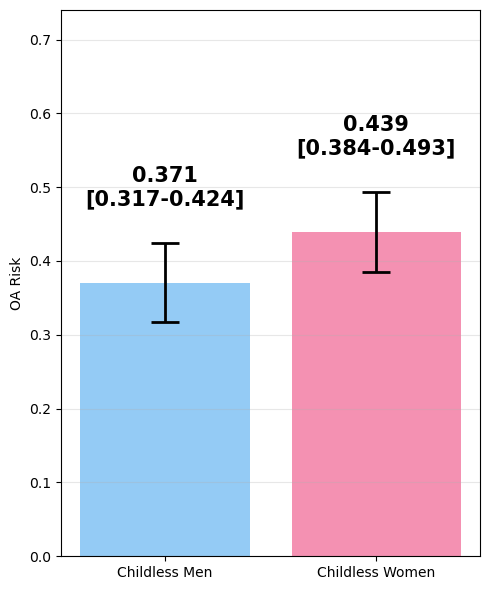

Age-adjusted OR 95% CI includes 1.0: No statistically significant sex difference.


In [14]:
df_no_kids = df[(df['has_kid'] == 0)]
y = df_no_kids['OA']
X = df_no_kids[['sex']]
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Calculate age-adjusted OR and 95% CI for sex
sex_ci = result.conf_int(alpha=0.05)
sex_or = np.exp(result.params['sex'])
sex_ci_or = np.exp(sex_ci.loc['sex'])
print(f"\nAge-adjusted OR for sex: {sex_or:.2f}")
print(f"95% CI: ({sex_ci_or[0]:.2f}, {sex_ci_or[1]:.2f})")
print(f"P-value for sex: {result.pvalues['sex']:.3f}")

# Predicted probabilities
df_no_kids['predicted_prob'] = result.predict(X)

# Masks for groups
men_mask = df_no_kids['sex'] == 0
women_mask = df_no_kids['sex'] == 1

# Mean predicted probabilities by sex (age-adjusted)
mean_prob_men = df_no_kids.loc[men_mask, 'predicted_prob'].mean()
mean_prob_women = df_no_kids.loc[women_mask, 'predicted_prob'].mean()

# Function to calculate 95% CI for predicted probabilities
def pred_prob_ci(group_mask):
    probs = df_no_kids.loc[group_mask, 'predicted_prob']
    n = len(probs)
    p_mean = probs.mean()
    se = np.sqrt(p_mean * (1 - p_mean) / n)
    margin = 1.96 * se
    return p_mean - margin, p_mean + margin

# Calculate CIs
ci_men_low, ci_men_high = pred_prob_ci(men_mask)
ci_women_low, ci_women_high = pred_prob_ci(women_mask)

# Data for plotting
categories = ['Childless Men', 'Childless Women']
probs = [mean_prob_men, mean_prob_women]
ci_low = [ci_men_low, ci_women_low]
ci_high = [ci_men_high, ci_women_high]

# Epidemiology-style plot with 95% CI error bars
plt.figure(figsize=(5, 6))
x_pos = np.arange(len(categories))

# Bar plot with error bars
plt.bar(x_pos, probs, color=["#67B6F2", '#F06292'], alpha=0.7,
        yerr=[probs[i] - ci_low[i] for i in range(len(probs))],
        capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Formatting
# plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xticks(x_pos, categories)
plt.ylim(0, max(ci_high) * 1.5)
plt.ylabel('OA Risk')
# plt.title('Childless Men vs Childless Women')
plt.grid(axis='y', alpha=0.3)

# Annotate point estimates and CIs
for i, v in enumerate(probs):
    plt.text(i, v + 0.1, f'{v:.3f}\n[{ci_low[i]:.3f}-{ci_high[i]:.3f}]', 
             ha='center', fontsize=15, weight='bold', va='bottom')

plt.tight_layout()
plt.show()

# Significance test
if sex_ci_or[0] > 1 or sex_ci_or[1] < 1:
    print("Age-adjusted OR 95% CI excludes 1.0: Statistically significant sex difference.")
else:
    print("Age-adjusted OR 95% CI includes 1.0: No statistically significant sex difference.")

#### 2. Risk of OA in Women without kid vs. Women with kids

In [15]:
# 2. Women without kid vs. Women with kid
women_without_kid = df[(df['sex'] == 1) & (df['has_kid'] == 0)]
women_with_kid = df[(df['sex'] == 1) & (df['has_kid'] == 1)]

print(f"Number of women without kids: {len(women_without_kid)}")
print(f"Number of women with kids: {len(women_with_kid)}")


women_without_kid_with_oa = women_without_kid[women_without_kid['OA'] == 1]
print(f"Number of women without kids who have OA: {len(women_without_kid_with_oa)}")


women_with_kid_with_oa = women_with_kid[women_with_kid['OA'] == 1]
print(f"Number of women with kids who have OA: {len(women_with_kid_with_oa)}")


Number of women without kids: 319
Number of women with kids: 2359
Number of women without kids who have OA: 140
Number of women with kids who have OA: 1200


Optimization terminated successfully.
         Current function value: 0.677715
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2678
Model:                          Logit   Df Residuals:                     2674
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Jan 2026   Pseudo R-squ.:                 0.02226
Time:                        19:01:46   Log-Likelihood:                -1814.9
converged:                       True   LL-Null:                       -1856.2
Covariance Type:            nonrobust   LLR p-value:                 8.273e-18
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9099      0.266     -7.185      0.000      -2.431      -1.389
has_kid       

/var/folders/lj/w83k8rr9017bd3y925h27x4c0000gp/T/ipykernel_99472/1092588124.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['predicted_prob'] = result.predict(X)


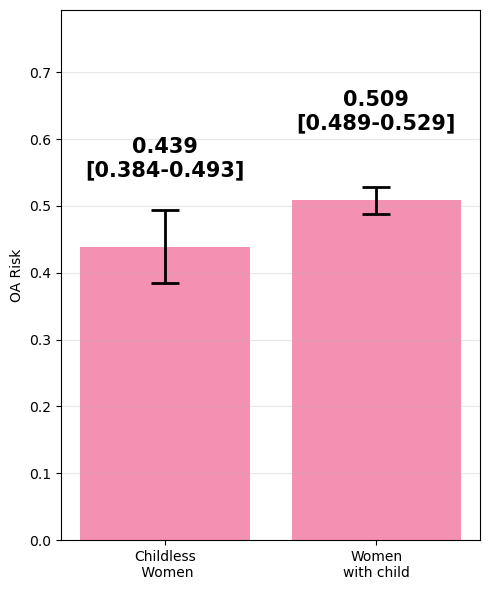

Education-adjusted OR 95% CI excludes 1.0: Statistically significant effect of motherhood on OA.


In [16]:
df_women = df[(df['sex'] == 1)]
y = df_women['OA']
X = df_women[['has_kid', 'level_education', 'bmi']]
X = sm.add_constant(X)

# Fit logistic regression model (education-adjusted)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Calculate education-adjusted OR and 95% CI for having kids
kid_ci = result.conf_int(alpha=0.05)
kid_or = np.exp(result.params['has_kid'])
kid_ci_or = np.exp(kid_ci.loc['has_kid'])
print(f"\nEducation-adjusted OR for having kids: {kid_or:.2f}")
print(f"95% CI: ({kid_ci_or[0]:.2f}, {kid_ci_or[1]:.2f})")
print(f"P-value for having kids: {result.pvalues['has_kid']:.3f}")

# Predicted probabilities
df_women['predicted_prob'] = result.predict(X)

# Masks for groups
no_kid_mask = df_women['has_kid'] == 0
with_kid_mask = df_women['has_kid'] == 1

# Mean predicted probabilities by motherhood status (education-adjusted)
mean_prob_without_kid = df_women.loc[no_kid_mask, 'predicted_prob'].mean()
mean_prob_with_kid = df_women.loc[with_kid_mask, 'predicted_prob'].mean()

# Function to calculate 95% CI for predicted probabilities
def pred_prob_ci(group_mask):
    probs = df_women.loc[group_mask, 'predicted_prob']
    n = len(probs)
    p_mean = probs.mean()
    se = np.sqrt(p_mean * (1 - p_mean) / n)
    margin = 1.96 * se
    return p_mean - margin, p_mean + margin

# Calculate CIs
ci_no_kid_low, ci_no_kid_high = pred_prob_ci(no_kid_mask)
ci_with_kid_low, ci_with_kid_high = pred_prob_ci(with_kid_mask)

# Data for plotting
categories = ['Childless\n Women', 'Women\nwith child']
probs = [mean_prob_without_kid, mean_prob_with_kid]
ci_low = [ci_no_kid_low, ci_with_kid_low]
ci_high = [ci_no_kid_high, ci_with_kid_high]

# Epidemiology-style plot with 95% CI error bars
plt.figure(figsize=(5, 6))
x_pos = np.arange(len(categories))

# Bar plot with error bars
plt.bar(x_pos, probs, color=['#F06292', '#F06292'], alpha=0.7,
        yerr=[probs[i] - ci_low[i] for i in range(len(probs))],
        capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Formatting
# plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xticks(x_pos, categories)
plt.ylim(0, max(ci_high) * 1.5)
plt.ylabel('OA Risk')
# plt.title('Childless women vs Women with child')
plt.grid(axis='y', alpha=0.3)

# Annotate point estimates and CIs
for i, v in enumerate(probs):
    plt.text(i, v + 0.1, f'{v:.3f}\n[{ci_low[i]:.3f}-{ci_high[i]:.3f}]', 
             ha='center', fontsize=15, weight='bold', va='bottom')

plt.tight_layout()
plt.show()

# Significance test (CI excludes 1.0)
if kid_ci_or[0] > 1 or kid_ci_or[1] < 1:
    print("Education-adjusted OR 95% CI excludes 1.0: Statistically significant effect of motherhood on OA.")
else:
    print("Education-adjusted OR 95% CI includes 1.0: No statistically significant effect of motherhood on OA.")

#### 3. Risk of OA in Men without kid vs. Men with kid

In [17]:
# 3. Men without kid vs. Men with kid
men_without_kid = df[(df['sex'] == 0) & (df['has_kid'] == 0)]
men_with_kid = df[(df['sex'] == 0) & (df['has_kid'] == 1)]

print(f"Number of men without kids: {len(men_without_kid) }")
print(f"Number of men with kids: {len(men_with_kid)}")

men_without_kid_with_oa = men_without_kid[men_without_kid['OA'] == 1]
print(f"Number of men without kids who have OA: {len(men_without_kid_with_oa)}")


men_with_kid_with_oa = men_with_kid[men_with_kid['OA'] == 1]
print(f"Number of men with kids who have OA: {len(men_with_kid_with_oa)}")


Number of men without kids: 313
Number of men with kids: 2328
Number of men without kids who have OA: 116
Number of men with kids who have OA: 1005


Optimization terminated successfully.
         Current function value: 0.656685
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     OA   No. Observations:                 2641
Model:                          Logit   Df Residuals:                     2636
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Jan 2026   Pseudo R-squ.:                 0.03668
Time:                        19:03:30   Log-Likelihood:                -1734.3
converged:                       True   LL-Null:                       -1800.3
Covariance Type:            nonrobust   LLR p-value:                 1.397e-27
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.5755      0.449    -10.194      0.000      -5.455      -3.696
has_kid       

/var/folders/lj/w83k8rr9017bd3y925h27x4c0000gp/T/ipykernel_99472/3889057155.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['predicted_prob'] = result.predict(X)


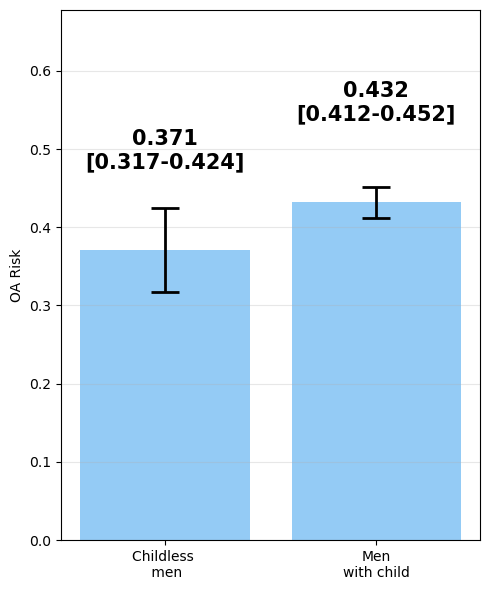

Adjusted OR 95% CI includes 1.0: No statistically significant effect of fatherhood on OA.


In [19]:
df_men = df[(df['sex'] == 0)]
y = df_men['OA']
X = df_men[['has_kid', 'age', 'level_education', 'bmi']]
X = sm.add_constant(X)

# Fit logistic regression model (age, education, BMI-adjusted)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Calculate adjusted OR and 95% CI for having kids
kid_ci = result.conf_int(alpha=0.05)
kid_or = np.exp(result.params['has_kid'])
kid_ci_or = np.exp(kid_ci.loc['has_kid'])
print(f"\nAdjusted OR for having kids: {kid_or:.2f}")
print(f"95% CI: ({kid_ci_or[0]:.2f}, {kid_ci_or[1]:.2f})")
print(f"P-value for having kids: {result.pvalues['has_kid']:.3f}")

# Predicted probabilities
df_men['predicted_prob'] = result.predict(X)

# Masks for groups
no_kid_mask = df_men['has_kid'] == 0
with_kid_mask = df_men['has_kid'] == 1

# Mean predicted probabilities by fatherhood status (adjusted)
mean_prob_without_kid = df_men.loc[no_kid_mask, 'predicted_prob'].mean()
mean_prob_with_kid = df_men.loc[with_kid_mask, 'predicted_prob'].mean()

# Function to calculate 95% CI for predicted probabilities
def pred_prob_ci(group_mask):
    probs = df_men.loc[group_mask, 'predicted_prob']
    n = len(probs)
    p_mean = probs.mean()
    se = np.sqrt(p_mean * (1 - p_mean) / n)
    margin = 1.96 * se
    return p_mean - margin, p_mean + margin

# Calculate CIs
ci_no_kid_low, ci_no_kid_high = pred_prob_ci(no_kid_mask)
ci_with_kid_low, ci_with_kid_high = pred_prob_ci(with_kid_mask)

# Data for plotting
categories = ['Childless \n men', 'Men\nwith child']
probs = [mean_prob_without_kid, mean_prob_with_kid]
ci_low = [ci_no_kid_low, ci_with_kid_low]
ci_high = [ci_no_kid_high, ci_with_kid_high]

# Epidemiology-style plot with 95% CI error bars
plt.figure(figsize=(5, 6))
x_pos = np.arange(len(categories))

# Bar plot with error bars
plt.bar(x_pos, probs, color=['#67B6F2', '#67B6F2'], alpha=0.7,
        yerr=[probs[i] - ci_low[i] for i in range(len(probs))],
        capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Formatting
# plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xticks(x_pos, categories)
plt.ylim(0, max(ci_high) * 1.5)
plt.ylabel('OA Risk')
# plt.title('Childless vs Fatherhood: OA Risk in Men')
plt.grid(axis='y', alpha=0.3)

# Annotate point estimates and CIs
for i, v in enumerate(probs):
    plt.text(i, v + 0.1, f'{v:.3f}\n[{ci_low[i]:.3f}-{ci_high[i]:.3f}]', 
             ha='center', fontsize=15, weight='bold', va='bottom')

plt.tight_layout()
plt.show()

# Significance test (CI excludes 1.0)
if kid_ci_or[0] > 1 or kid_ci_or[1] < 1:
    print("Adjusted OR 95% CI excludes 1.0: Statistically significant effect of fatherhood on OA.")
else:
    print("Adjusted OR 95% CI includes 1.0: No statistically significant effect of fatherhood on OA.")


#### 7. Is the OA risk burden dose (number of kids) dependent in woman? alfa = ?

Optimization terminated successfully.
         Current function value: 0.677017
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657033
         Iterations 5


/var/folders/lj/w83k8rr9017bd3y925h27x4c0000gp/T/ipykernel_99472/780835034.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women['predicted_prob'] = result_women.predict()
/var/folders/lj/w83k8rr9017bd3y925h27x4c0000gp/T/ipykernel_99472/780835034.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_men['predicted_prob'] = result_men.predict()


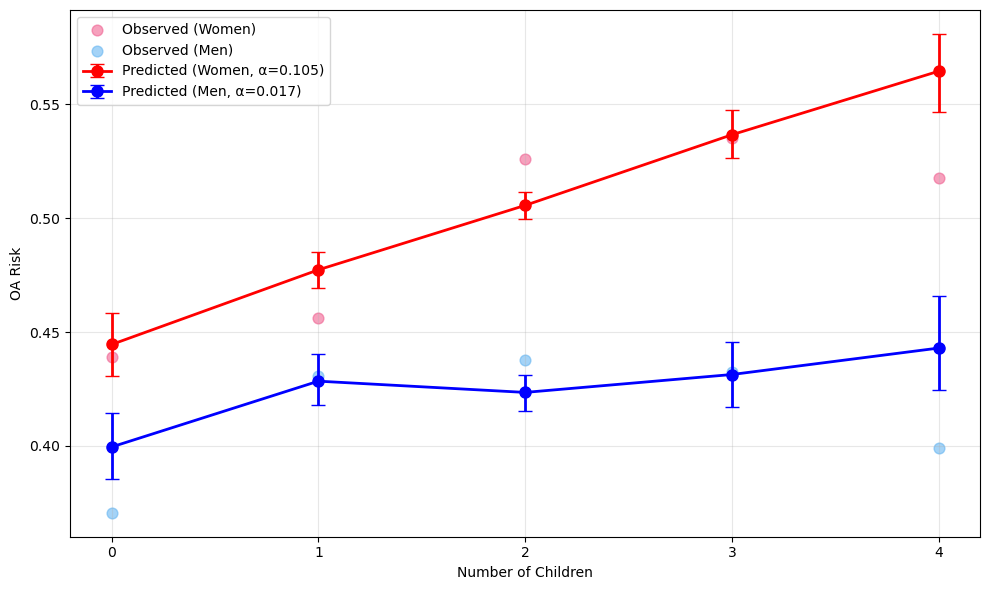

Odds ratio for N_kids (Women): 0.105
P-value for N_kids (Women): 0.006
Odds ratio for N_kids (Men): 0.017
P-value for N_kids (Men): 0.660
✓ Significant association (Women)
✗ No significant association (Men)


In [21]:

df_women = df[df['sex'] == 1]
df_men = df[df['sex'] == 0]

y_women = df_women['OA']
X_women = df_women[['N_kids', 'level_education', 'bmi']]
X_women = sm.add_constant(X_women)
logit_model_women = sm.Logit(y_women, X_women)
result_women = logit_model_women.fit()

y_men = df_men['OA']
X_men = df_men[['N_kids', 'age', 'level_education', 'bmi']]
X_men = sm.add_constant(X_men)
logit_model_men = sm.Logit(y_men, X_men)
result_men = logit_model_men.fit()

df_women['predicted_prob'] = result_women.predict()
df_men['predicted_prob'] = result_men.predict()

# FIXED: Get means FIRST to create Series with index
grouped_probs_women_mean = df_women.groupby('N_kids')['predicted_prob'].mean()
grouped_OA_women = df_women.groupby('N_kids')['OA'].mean()
grouped_probs_men_mean = df_men.groupby('N_kids')['predicted_prob'].mean()
grouped_OA_men = df_men.groupby('N_kids')['OA'].mean()

alpha_women = result_women.params['N_kids']
alpha_men = result_men.params['N_kids']

# Bootstrap function (unchanged)
def bootstrap_ci(group_data, n_boot=1000, alpha=0.05/5):
    boot_means = [group_data.sample(frac=1, replace=True).mean() for _ in range(n_boot)]
    boot_means = np.array(boot_means)
    ci_lower = np.percentile(boot_means, 100*(alpha/2))
    ci_upper = np.percentile(boot_means, 100*(1-alpha/2))
    return ci_lower, ci_upper

# Get group data for bootstrap
grouped_probs_women = df_women.groupby('N_kids')['predicted_prob']
grouped_probs_men = df_men.groupby('N_kids')['predicted_prob']

# Calculate CIs for women
ci_women = {}
for n_kids in grouped_probs_women.groups:
    group_data = grouped_probs_women.get_group(n_kids)
    ci_women[n_kids] = bootstrap_ci(group_data)

# Calculate CIs for men
ci_men = {}
for n_kids in grouped_probs_men.groups:
    group_data = grouped_probs_men.get_group(n_kids)
    ci_men[n_kids] = bootstrap_ci(group_data)

# FIXED: Extract arrays using the mean Series (which have .index)
n_kids_vals_women = sorted(grouped_probs_women_mean.index)
n_kids_vals_men = sorted(grouped_probs_men_mean.index)
n_kids_vals = sorted(set(n_kids_vals_women + n_kids_vals_men))

# Women data (only available N_kids)
probs_women = grouped_probs_women_mean.values
ci_women_lower = [ci_women[i][0] for i in n_kids_vals_women]
ci_women_upper = [ci_women[i][1] for i in n_kids_vals_women]

# Men data (only available N_kids)  
probs_men = grouped_probs_men_mean.values
ci_men_lower = [ci_men[i][0] for i in n_kids_vals_men]
ci_men_upper = [ci_men[i][1] for i in n_kids_vals_men]

# Plotting
plt.figure(figsize=(10, 6))
n_kids_range_women = np.arange(len(n_kids_vals_women))
n_kids_range_men = np.arange(len(n_kids_vals_men))

# Women: observed + predicted with error bars
plt.scatter(grouped_OA_women.index, grouped_OA_women.values, alpha=0.6, 
            label='Observed (Women)', color='#F06292', s=60)
plt.errorbar(n_kids_range_women, probs_women, 
             yerr=[probs_women - np.array(ci_women_lower), 
                   np.array(ci_women_upper) - probs_women],
             fmt='o-', color='red', linewidth=2, markersize=8, capsize=5, 
             label=f'Predicted (Women, α={alpha_women:.3f})')

# Men: observed + predicted with error bars
plt.scatter(grouped_OA_men.index, grouped_OA_men.values, alpha=0.6, 
            label='Observed (Men)', color='#67B6F2', s=60)
plt.errorbar(n_kids_range_men, probs_men, 
             yerr=[probs_men - np.array(ci_men_lower), 
                   np.array(ci_men_upper) - probs_men],
             fmt='o-', color='blue', linewidth=2, markersize=8, capsize=5, 
             label=f'Predicted (Men, α={alpha_men:.3f})')

# Set x-ticks separately for men/women if different lengths
all_ticks = sorted(set(list(grouped_OA_women.index) + list(grouped_OA_men.index)))
plt.xticks(np.arange(max(len(n_kids_vals_women), len(n_kids_vals_men))), 
           [str(i) for i in all_ticks[:max(len(n_kids_vals_women), len(n_kids_vals_men))]])

plt.xlabel('Number of Children')
plt.ylabel('OA Risk')
# plt.title('OA Risk')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Your odds ratio prints
odds_ratio_women = result_women.params['N_kids']
odds_ratio_men = result_men.params['N_kids']
p_value_women = result_women.pvalues['N_kids']
p_value_men = result_men.pvalues['N_kids']

print(f"Odds ratio for N_kids (Women): {odds_ratio_women:.3f}")
print(f"P-value for N_kids (Women): {p_value_women:.3f}")
print(f"Odds ratio for N_kids (Men): {odds_ratio_men:.3f}")
print(f"P-value for N_kids (Men): {p_value_men:.3f}")

if p_value_women < 0.05:
    print("✓ Significant association (Women)")
else:
    print("✗ No significant association (Women)")
if p_value_men < 0.05:
    print("✓ Significant association (Men)")
else:
    print("✗ No significant association (Men)")


In [51]:
result_women.conf_int()

,0,1
const,-2.363833,-1.380499
N_kids,0.030856,0.179843
level_education,-0.141612,0.021684
bmi,0.051449,0.084633


In [52]:
result_men.conf_int()

,0,1
const,-5.334888,-3.603625
N_kids,-0.058023,0.091543
age,0.028818,0.044495
level_education,-0.211713,-0.041127
bmi,0.047238,0.087380


### Table